# Trading History

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from portfolio_constrained_min import *
from datetime import datetime, timedelta
import pickle


Bad key text.latex.unicode in file C:\Users\Ziv\AppData\Roaming\Python\Python38\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file C:\Users\Ziv\AppData\Roaming\Python\Python38\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Ziv\AppData\Roaming\Python\Python38\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use sy

In [2]:
df = pd.read_csv('stock trading history.csv')  
df.dropna(subset=['Transaction'], inplace=True)

df.head()

,Description,Symbol,Acct Type,Transaction,Date,Qty,Price,Debit,Credit
0,ACH Deposit,NaN,Margin,ACH,5/19/2020,NaN,NaN,NaN,"$1,500.00"
1,SunPower,NaN,Margin,REC,5/19/2020,1,NaN,NaN,NaN
2,Delta Air Lines,DAL,Margin,Buy,5/20/2020,2.110326,$22.60,$47.69,NaN
3,Delta Air Lines,DAL,Margin,Buy,5/20/2020,42,$22.60,$949.13,NaN
4,Delta Air Lines,DAL,Margin,Buy,5/20/2020,0.14075,$22.60,$3.18,NaN


In [3]:
tickers = df['Symbol'].unique()
tickers = tickers[~pd.isnull(tickers)]
tickers = list(tickers)

new_stocks = ['RKT', 'LMND', 'VRM']
for s in new_stocks:
    tickers.remove(s)

tickers

['DAL',
 'MSFT',
 'AMD',
 'GLW',
 'ACB',
 'CWH',
 'NPTN',
 'CUB',
 'TRUP',
 'PYPL',
 'PLAY',
 'SPWR',
 'KOPN',
 'M',
 'INTU',
 'TSLA',
 'FCEL',
 'PLUG',
 'RUN',
 'WKHS',
 'SPOT',
 'TCEHY',
 'MJ']

In [4]:
price_history = yf.download(tickers, period="max")

[*********************100%***********************]  23 of 23 completed

1 Failed download:
- CUB: No data found, symbol may be delisted


In [5]:
price_history = price_history["Adj Close"].dropna(how="all")
price_history = price_history.sort_values(['Date'], ascending=False)
price_history = price_history.drop(columns='CUB')
price_history = price_history.drop(index = price_history.index[0]) # remove first row if some stocks are missing most recent price

price_history.head()

,ACB,AMD,CWH,DAL,FCEL,GLW,INTU,KOPN,M,MJ,...,PLAY,PLUG,PYPL,RUN,SPOT,SPWR,TCEHY,TRUP,TSLA,WKHS
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,1.35,73.669998,21.91,29.520000,3.78,31.910000,388.309998,1.14,17.969999,5.87,...,33.709999,17.180000,71.400002,24.360001,97.519997,15.650000,45.279999,61.009998,681.789978,2.60
2022-06-30 00:00:00,1.32,76.470001,21.59,28.969999,3.75,31.510000,385.440002,1.12,18.320000,5.80,...,32.779999,16.570000,69.839996,23.360001,93.830002,15.810000,45.389999,60.259998,673.419983,2.60
2022-06-29 00:00:00,1.37,77.989998,21.76,29.639999,3.59,32.380001,389.660004,1.18,18.830000,5.95,...,33.770000,16.350000,71.470001,22.200001,97.959999,15.140000,46.400002,60.410000,685.469971,2.60
2022-06-28 00:00:00,1.49,80.779999,21.60,30.330000,3.70,32.500000,386.290009,1.21,19.379999,6.19,...,33.619999,17.129999,71.820000,23.700001,99.000000,16.969999,45.650002,60.750000,697.989990,2.72
2022-06-27 00:00:00,1.55,86.160004,23.02,30.440001,3.86,33.290001,404.720001,1.22,20.200001,6.41,...,34.950001,18.100000,75.940002,25.590000,106.269997,18.129999,47.220001,63.099998,734.760010,2.92


In [6]:
first_date = price_history[price_history.isnull().any(axis=1)].index[0]

first_date

Timestamp('2018-04-02 00:00:00')

In [7]:
from dateutil import parser

# trading_start_date = parser.parse(df['Date'].min())
trading_start_date = parser.parse(df['Date'].iloc[0])

trading_start_date

datetime.datetime(2020, 5, 19, 0, 0)

In [8]:
prices = price_history[(first_date < price_history.index) & (price_history.index < trading_start_date)]

In [9]:
prices

,ACB,AMD,CWH,DAL,FCEL,GLW,INTU,KOPN,M,MJ,...,PLAY,PLUG,PYPL,RUN,SPOT,SPWR,TCEHY,TRUP,TSLA,WKHS
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-18,17.100000,54.590000,15.564902,21.860001,1.910000,19.735790,287.054565,0.81,5.273784,12.079306,...,11.570000,4.17,146.240005,15.140,161.429993,4.695481,55.289635,29.150000,162.725998,2.59
2020-05-15,11.200000,54.200001,13.860718,19.190001,1.840000,18.493479,281.142822,0.76,5.166751,11.192494,...,9.750000,4.08,145.509995,14.070,158.830002,4.151932,53.612087,27.690001,159.834000,2.51
2020-05-14,6.640000,54.509998,12.750813,19.379999,1.880000,18.766409,277.069855,0.73,4.874845,10.361694,...,9.860000,4.06,144.410004,13.965,152.070007,4.237066,55.587429,25.879999,160.666000,2.51
2020-05-13,5.800000,52.180000,12.908121,19.410000,1.880000,18.474655,273.995392,0.74,4.884575,10.231005,...,9.260000,4.11,143.729996,13.540,148.979996,4.459725,57.250092,26.209999,158.192001,2.54
2020-05-12,6.460000,53.759998,12.951818,21.030001,1.960000,19.208752,278.463745,0.87,4.855383,10.781762,...,10.110000,4.28,141.029999,13.970,153.940002,4.629993,54.794956,28.100000,161.882004,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-09,69.888000,9.530000,23.368639,49.863350,22.320000,23.831825,164.794159,3.01,24.358696,23.180801,...,41.154579,1.83,75.190002,8.190,150.000000,5.337263,51.247013,26.180000,57.931999,2.60
2018-04-06,75.875999,9.610000,24.410404,50.328209,21.600000,23.689068,162.751144,3.05,24.901861,23.859264,...,40.733337,1.80,73.860001,8.520,147.919998,5.304519,50.498302,27.020000,59.860001,2.61
2018-04-05,79.764000,10.020000,25.602118,51.428692,21.360001,24.501013,166.779129,3.06,25.846125,24.442049,...,40.713745,1.83,76.949997,9.940,143.990005,5.284872,51.828251,26.639999,61.144001,2.66


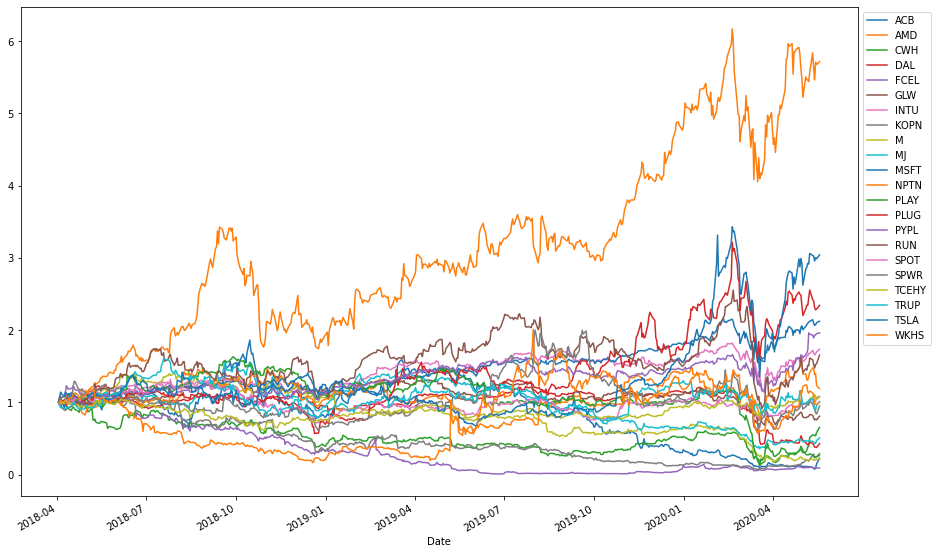

In [10]:
og_prices = prices.iloc[-1]

prices_percent = prices.copy()
prices_percent = prices_percent.apply(lambda x: x/og_prices, axis=1)

prices_percent.plot(figsize=(15,10))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

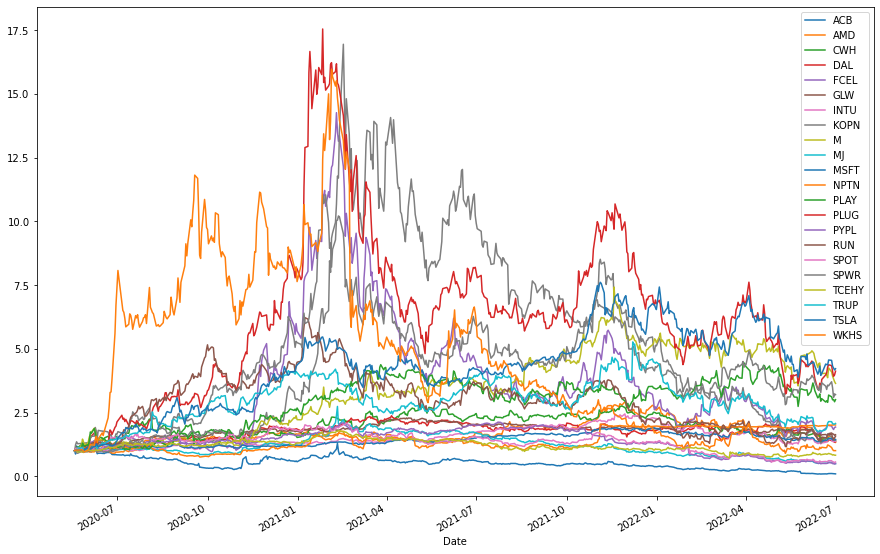

In [11]:
future_prices = price_history[price_history.index >= trading_start_date]
og_prices = future_prices.iloc[-1]

prices_percent = future_prices.copy()
prices_percent = prices_percent.apply(lambda x: x/og_prices, axis=1)

prices_percent.plot(figsize=(15,10))

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Baseline Portfolio

In [12]:
baseline_weights = {}
equal_weight = 1/ len(prices.columns)
for stock in prices.columns:
    baseline_weights[stock] = equal_weight
baseline_weights

{'ACB': 0.045454545454545456,
 'AMD': 0.045454545454545456,
 'CWH': 0.045454545454545456,
 'DAL': 0.045454545454545456,
 'FCEL': 0.045454545454545456,
 'GLW': 0.045454545454545456,
 'INTU': 0.045454545454545456,
 'KOPN': 0.045454545454545456,
 'M': 0.045454545454545456,
 'MJ': 0.045454545454545456,
 'MSFT': 0.045454545454545456,
 'NPTN': 0.045454545454545456,
 'PLAY': 0.045454545454545456,
 'PLUG': 0.045454545454545456,
 'PYPL': 0.045454545454545456,
 'RUN': 0.045454545454545456,
 'SPOT': 0.045454545454545456,
 'SPWR': 0.045454545454545456,
 'TCEHY': 0.045454545454545456,
 'TRUP': 0.045454545454545456,
 'TSLA': 0.045454545454545456,
 'WKHS': 0.045454545454545456}

# Custom Portfolio Optimization Build

In [13]:
# Log of percentage change
change = prices.copy().sort_values(['Date'], ascending=True).pct_change().apply(lambda x: np.log(1+x))
change.head()

,ACB,AMD,CWH,DAL,FCEL,GLW,INTU,KOPN,M,MJ,...,PLAY,PLUG,PYPL,RUN,SPOT,SPWR,TCEHY,TRUP,TSLA,WKHS
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,-0.044017,0.022775,0.037814,0.002603,0.017493,0.001096,0.015021,0.022691,0.037242,0.008399,...,-0.002214,0.027703,0.002946,0.069575,-0.032673,0.014465,0.007248,-0.033172,0.070041,0.003868
2018-04-05,0.102406,0.025267,0.037053,0.006477,0.028492,0.002553,-0.007075,-0.019418,0.027534,0.021583,...,0.023370,0.000000,0.028605,0.012146,-0.001596,0.052141,-0.000190,-0.045137,0.063397,0.026668
2018-04-06,-0.049972,-0.041779,-0.047666,-0.021630,0.011173,-0.033701,-0.024448,-0.003273,-0.037218,-0.024132,...,0.000481,-0.016529,-0.040984,-0.154151,0.026928,0.003711,-0.025996,0.014164,-0.021223,-0.018976
2018-04-09,-0.082206,-0.008359,-0.043615,-0.009279,0.032790,0.006008,0.012475,-0.013201,-0.022054,-0.028848,...,0.010288,0.016529,0.017847,-0.039503,0.013964,0.006154,0.014718,-0.031582,-0.032739,-0.003839


In [14]:
# Variance
stocks_var = change.var()
# Volatility
stocks_vol = np.sqrt(stocks_var * 250) # multiply by 250 to convert to annual volitility (250 trading days in a year)
# Covariance
stock_cov = change.cov()
# Correlation
stock_corr = change.corr()
# Daily Expected Return
exp_return = change.mean()
exp_return

ACB     -0.002769
AMD      0.003259
CWH     -0.000790
DAL     -0.001582
FCEL    -0.004427
GLW     -0.000397
INTU     0.001030
KOPN    -0.002478
M       -0.002850
MJ      -0.001261
MSFT     0.001408
NPTN     0.000327
PLAY    -0.002312
PLUG     0.001591
PYPL     0.001259
RUN      0.000939
SPOT     0.000150
SPWR    -0.000097
TCEHY    0.000134
TRUP     0.000022
TSLA     0.002079
WKHS     0.000007
dtype: float64

In [15]:
# Portfolio Expected Return
w = np.ones(len(exp_return)) * equal_weight
er = np.array(exp_return)
portfolio_er = w @ er.T
# Portfolio Variance and std
portfolio_var = stock_cov @ w.T @ w
portfolio_ann_sd = np.sqrt( portfolio_var * 250)
# Sharp Ratio
risk_free_rate = .01 # hyper-parameter
sharp_ratio = (portfolio_er - risk_free_rate) / portfolio_ann_sd
sharp_ratio

-0.028995192288467645

In [16]:
# sectors = []
# for stock in list(prices.columns):
#     try:
#         sectors.append(yf.Ticker(stock).info['sector'])
#     except:
#         sectors.append('unknown')
        
# pickle.dump(sectors, open('sectors.pkl', 'wb'))

sectors = pickle.load(open('sectors.pkl', 'rb'))

In [17]:
d = {'exp_return':np.array(exp_return), 'volatility':np.array(stocks_vol), 'sector':sectors }
# d = {'exp_return':np.array(exp_return), 'volatility':np.array(stocks_vol)}
stock_df = pd.DataFrame(data=d, index=prices.columns)
stock_df = stock_df.sort_values(['exp_return'], ascending=False)
stock_df

,exp_return,volatility,sector
AMD,0.003259,0.619604,Technology
TSLA,0.002079,0.672243,Consumer Cyclical
PLUG,0.001591,0.659127,Industrials
MSFT,0.001408,0.328481,Technology
PYPL,0.001259,0.393034,Financial Services
INTU,0.001030,0.365026,Technology
RUN,0.000939,0.649527,Technology
NPTN,0.000327,0.634332,Technology
SPOT,0.000150,0.408318,Communication Services
TCEHY,0.000134,0.355622,Communication Services


# S&P Portfolio  Optimization Build

In [18]:
# Get tickers for sp500

# There are 2 tables on the Wikipedia page
# we want the first table
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_df = payload[0]
sp_tickers = sp_df['Symbol'].values.tolist()

# download price history and filter database
sp500_history = yf.download(sp_tickers, period="max")

sp500_history = sp500_history["Adj Close"].dropna(how="all")
sp500_history = sp500_history.sort_values(['Date'], ascending=False)
for stock in sp_tickers:
    if pd.isnull(sp500_history[stock].loc[trading_start_date]):
        sp500_history = sp500_history.drop(columns=stock)  
sp500_history = sp500_history.drop(index = sp500_history.index[0]) # remove first row if some stocks are missing most recent price

try:
    sp_first_date = sp500_history[sp500_history.isnull().any(axis=1)].index[0]
except:
    sp_first_date = sp500_history.index[0]

sp_prices = sp500_history[(sp_first_date < sp500_history.index) & (sp500_history.index < trading_start_date)]
sp_future_prices = sp500_history[sp500_history.index >= trading_start_date]

#calculate neccessarry feature values
# Log of percentage change
sp_change = sp_prices.copy().sort_values(['Date'], ascending=True).pct_change().apply(lambda x: np.log(1+x))
# Covariance
sp_cov = sp_change.cov()
# Daily Expected Return
sp_exp_return = sp_change.mean()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [19]:
# Take 25 SP stocks with highest expected return
sp_d = {'exp_return':np.array(sp_exp_return)}
sp_df = pd.DataFrame(data=sp_d, index=sp_prices.columns)
sp_df = sp_df.sort_values(['exp_return'], ascending=False)
sp_df = sp_df.iloc[:25]

sp_prices = sp_prices[sp_df.index]
sp_future_prices = sp_future_prices[sp_df.index]

#calculate neccessarry feature values
# Log of percentage change
sp_change = sp_prices.copy().sort_values(['Date'], ascending=True).pct_change().apply(lambda x: np.log(1+x))
# Covariance
sp_cov = sp_change.cov()
# Daily Expected Return
sp_exp_return = sp_change.mean()

# Portfolio Optimization Functions

In [20]:
def portfolio_er_func(w, er, cov, gamma):
    f = er.T@w - gamma*(w.T @ w)
    f = f[0][0]
    g = er - \
        2*gamma*w
    h = -2*gamma
    
    return -f, -g, -h

def portfolio_sharp_func(w, er, cov, gamma):
    f = (er.T@w - risk_free_rate) * (w.T @ cov @ w * 250)**(-.5) - gamma*(w.T @ w)
    f = f[0][0]
    g = er*(w.T @ cov @ w * 250)**(-.5) - \
        (er.T@w - risk_free_rate) * (w.T @ cov @ w * 250)**(-1.5) * (cov @ w * 250) - \
        2*gamma*w
    h = -2*er.T*(w.T @ cov @ w * 250)**(-1.5) @ (cov @ w * 250) + \
        3*(er.T@w - risk_free_rate)*(w.T @ cov @ w * 250)**(-2.5)*(cov @ w * 250).T @ (cov @ w * 250) - \
        (er.T@w - risk_free_rate)*(w.T @ cov @ w * 250)**(-1.5)*250*cov - \
        2*gamma
    
    return -f, -g, -h

def ineq(w, idx):
    n = len(w)
    
    f = -w[idx]
    g = np.zeros((1, n)).T
    g[idx] = -1
    h = np.zeros((n,n))
    
    return f, g, h

def portfolio_optimizer(func, ineq, exp_return, stock_cov, basic_params, future_prices):

    # Basic hyper-parameters
    obj_tol, param_tol, max_iter, eps, mu, risk_free_rate, gamma = basic_params

    # Custom parameters
    n = len(exp_return)
    x0 = np.ones((n,1)) * (1/n)
    ineq_constraints = [ineq] * n
    eq_constraints_mat = np.ones((1,n))
    eq_constraints_rhs = np.array([[1]])
    er = np.array(exp_return).reshape(-1,1)
    cov = np.array(stock_cov)

    # Optimization
    optimized_weights, iters = interior_pt(func, er, cov, ineq_constraints, eq_constraints_mat, eq_constraints_rhs,
                                           x0, obj_tol, param_tol, max_iter, eps, mu, gamma)
    
    # Remove neglible weight stocks
    negligible_weights = np.argwhere(optimized_weights < .005)[:,0]

    cov = np.delete(cov, negligible_weights, axis=0)
    cov = np.delete(cov, negligible_weights, axis=1)
    er = np.delete(er, negligible_weights, axis=0)

    n = len(er)
    x0 = np.ones((n,1)) * (1/n)
    ineq_constraints = [ineq] * n
    eq_constraints_mat = np.ones((1,n))

    optimized_weights, iters = interior_pt(func, er, cov, ineq_constraints, eq_constraints_mat, eq_constraints_rhs,
                                           x0, obj_tol, param_tol, max_iter, eps, mu, gamma)

    # calculate filtered optimized portfolio
    optimized_weights_dict = {}
    portfolio_end_val = 0
    
    filtered_stocks = []
    for i, stock in enumerate(stock_cov.columns):
        if i in negligible_weights:
            pass
        else:
            filtered_stocks.append(stock)
    for i, stock in enumerate(filtered_stocks):
        weight = optimized_weights[i][0]
        optimized_weights_dict[stock] = weight

        invest_val = weight * portfolio_init_val
        quantity = invest_val / future_prices.iloc[-1][stock]

        portfolio_end_val += quantity * future_prices.iloc[0][stock]
        
    portfolio_er = er.T@optimized_weights
    portfolio_vol = (optimized_weights.T @ cov @ optimized_weights * 250)**(.5)
    

    return optimized_weights_dict, portfolio_end_val, portfolio_er, portfolio_vol

# Baseline Portfolio

In [21]:
portfolio_init_val = 3950
purchase_quantities = {}

for stock in baseline_weights.keys():
    if baseline_weights[stock] == 0:
        pass
    else:
        invest_val = baseline_weights[stock] * portfolio_init_val
        quantity = invest_val / future_prices.iloc[-1][stock]
        purchase_quantities[stock] = quantity
        
purchase_quantities

{'ACB': 12.255662745434735,
 'AMD': 3.23680278698899,
 'CWH': 11.438936078177427,
 'DAL': 8.251169699306603,
 'FCEL': 91.60482196479997,
 'GLW': 9.154204520656558,
 'INTU': 0.6333712301574933,
 'KOPN': 224.43181483752355,
 'M': 36.39513993373196,
 'MJ': 15.192631127398064,
 'MSFT': 0.9980570083128288,
 'NPTN': 22.9891748861595,
 'PLAY': 16.00226829522174,
 'PLUG': 43.0564631320161,
 'PYPL': 1.234923002264198,
 'RUN': 11.57610908419687,
 'SPOT': 1.02579818201251,
 'SPWR': 36.70226438704769,
 'TCEHY': 3.2649467348643944,
 'TRUP': 6.088350489622496,
 'TSLA': 1.1110348200198976,
 'WKHS': 69.32257161986819}

In [22]:
portfolio_end_val = 0

for stock in purchase_quantities.keys():
    portfolio_end_val += purchase_quantities[stock] * future_prices.iloc[0][stock]
    
portfolio_end_val

7033.341015268979

# Maximize Expected Return

In [23]:
# Basic hyper-parameters
obj_tol = 10**-12
param_tol = 10**-8
max_iter = 1000
eps = obj_tol
mu = 10
risk_free_rate = .01 
gamma = .1
basic_params = [obj_tol, param_tol, max_iter, eps, mu, risk_free_rate, gamma]

func = portfolio_er_func

portfolio_1 = portfolio_optimizer(func, ineq, exp_return, stock_cov, basic_params, future_prices)
optimized_weights_dict_1, portfolio_end_val_1, portfolio_er_1, portfolio_vol_1 = portfolio_1
portfolio_end_val_1

C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:10: RuntimeWarning: invalid value encountered in log
  f = f - np.log(-f_temp)
C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  iterations = np.array(iterations)


7105.362233532114

In [24]:
optimized_weights_dict_1

{'ACB': 0.033144124602630415,
 'AMD': 0.06328350695462208,
 'CWH': 0.04303959044377101,
 'DAL': 0.03908007512415563,
 'FCEL': 0.02485602068717934,
 'GLW': 0.045003678165272225,
 'INTU': 0.052139943811511796,
 'KOPN': 0.03459965625542914,
 'M': 0.032741953714225065,
 'MJ': 0.04068408458348023,
 'MSFT': 0.0540298587346646,
 'NPTN': 0.048624565961028036,
 'PLAY': 0.03543020046675504,
 'PLUG': 0.05494699576224344,
 'PYPL': 0.05328664339377349,
 'RUN': 0.05168710224078701,
 'SPOT': 0.04773910291095227,
 'SPWR': 0.0465082604751521,
 'TCEHY': 0.047661062593727516,
 'TRUP': 0.04710054387326693,
 'TSLA': 0.057385979726964784,
 'WKHS': 0.04702704951840818}

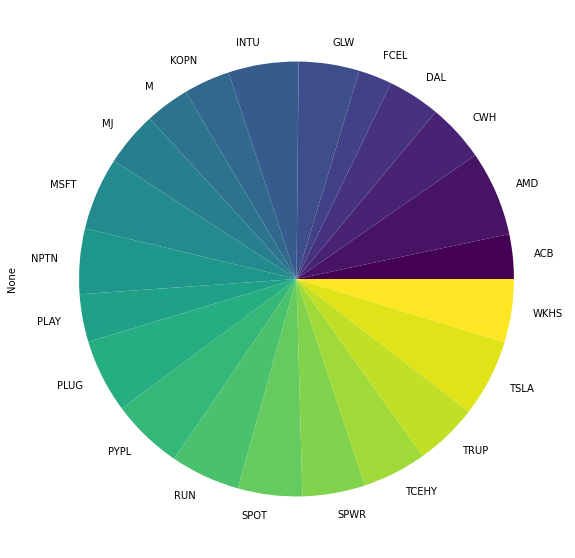

In [25]:
pd.Series(optimized_weights_dict_1).plot.pie(figsize=(10, 10), colormap='viridis')
plt.show()

# Maximize Sharp Ratio

In [26]:
func = portfolio_sharp_func

portfolio_2 = portfolio_optimizer(func, ineq, exp_return, stock_cov, basic_params, future_prices)
optimized_weights_dict_2, portfolio_end_val_2, portfolio_er_2, portfolio_vol_2 = portfolio_2
portfolio_end_val_2

C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:10: RuntimeWarning: invalid value encountered in log
  f = f - np.log(-f_temp)
C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  iterations = np.array(iterations)


7438.391453418467

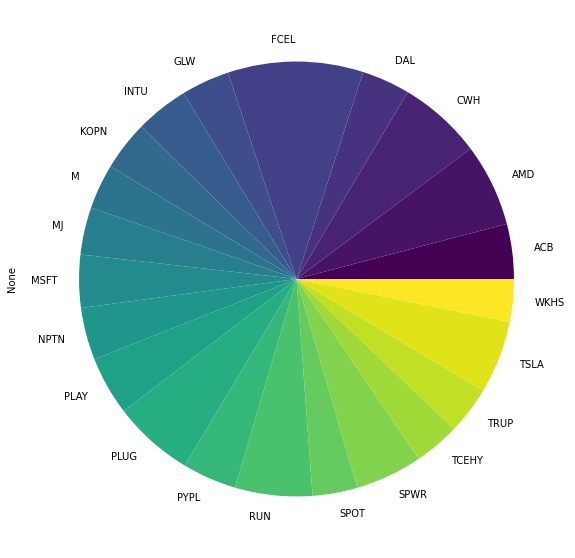

In [27]:
pd.Series(optimized_weights_dict_2).plot.pie(figsize=(10, 10), colormap='viridis')
plt.show()

# Buy the Dip

In [28]:
def dip_rank(stock, plot):
    all_prices = prices.copy().sort_values(['Date'], ascending=True)
    price_hist = all_prices[stock]

    n = len(price_hist)
    movement = np.zeros(n)
    for i in range(1,n):
        if price_hist.iloc[i] > price_hist.iloc[i-1]:
            movement[i] = 1
        else:
            movement[i] = -1

    trends = []
    start = None    
    tolerance = 3
    for i in range(1,n):
        if movement[i] == -1:
            if start is None:
                start, end = price_hist.index[i-1], price_hist.index[i-1]
                price_max, price_min = price_hist.iloc[i-1], price_hist.iloc[i]
            else:
                if price_hist.iloc[i] <= price_min:
                    price_min = price_hist.iloc[i]
                    end = price_hist.index[i]
                if i == n-1:
                    trends.append([start, end])
                    start = None
        else:
            if start is None:
                pass
            else:
                if price_hist.iloc[i] >= price_max:
                    trends.append([start, end])
                    start = None
                elif i == n-1:
                    trends.append([start, end])
                    start = None
                    
            
    last_trend = trends[-1]
    trend_history = price_hist.loc[last_trend[0]:last_trend[1]]
    price_min = trend_history.min()
    price_max = trend_history.max()

    # Fibonacci Levels considering original trend as upward move
    diff = price_max - price_min
    level1 = price_max - 0.236 * diff
    level2 = price_max - 0.382 * diff
    level3 = price_max - 0.618 * diff

    # rank current price status
    allowed_date = last_trend[1] + timedelta(days=tolerance)
    last_price = price_hist.iloc[0]
    if allowed_date >= trading_start_date:
        rank = 0
    elif last_trend[0] == last_trend[1]:
        rank = 0
    elif last_price >= price_max:
        rank = 0
    elif last_price >= level3:
        rank = 1
    elif last_price >= level2:
        rank = 2
    elif last_price >= level1:
        rank = 3
    elif last_price >= price_min:
        rank = 4
    elif last_price < price_min:
        rank = -1
    trend_len = (last_trend[1] - last_trend[0]).days
    rank *= trend_len / 5
    
    
    # To plot
    if plot:
        print(f'current price rank: {rank}')
        fig, ax = plt.subplots(figsize=(15,10))
        ax.plot(price_hist, color='black')



        print ("Level", "Price")
        print ("0 ", price_max)
        print ("0.236", level1)
        print ("0.382", level2)
        print ("0.618", level3)
        print ("1 ", price_min)

        ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
        ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
        ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
        ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

        plt.ylabel("Price")
        plt.xlabel("Date")
        plt.axvline(x=last_trend[0])
        plt.axvline(x=last_trend[1])
        plt.show()
    
    return rank

current price rank: 110.0
Level Price
0  32.62895202636719
0.236 28.87097180175781
0.382 26.54611962890625
0.618 22.788139404296874
1  16.705307006835938


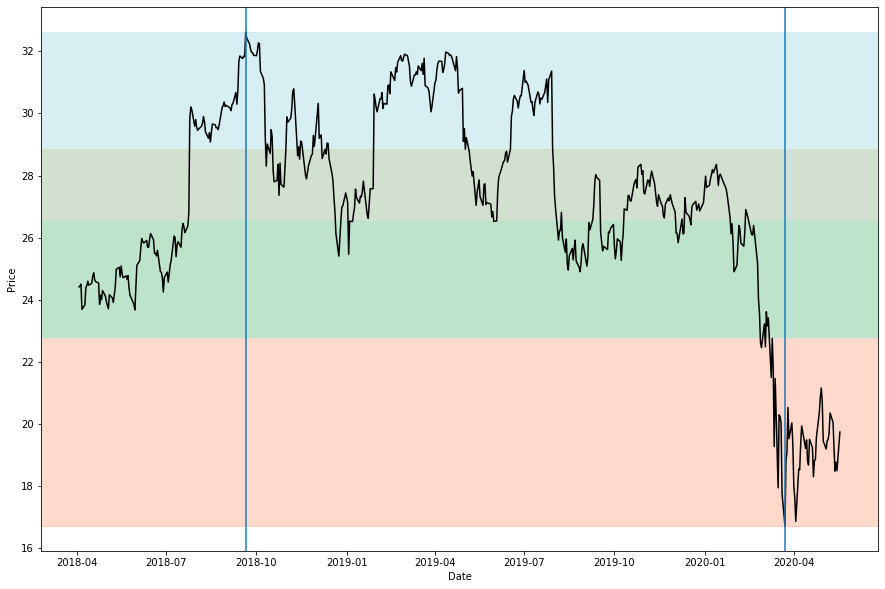

In [29]:
stock = 'GLW'

rank = dip_rank(stock, plot=True)

In [30]:
ranks = []
for stock in prices.columns:
    rank = dip_rank(stock, plot=False)
    ranks.append(rank)

ranks = np.array(er).reshape((-1,1))
print(ranks)
    
norm = np.linalg.norm(ranks)
ranks = ranks/norm
print(ranks)

[[-2.76935419e-03]
 [ 3.25852251e-03]
 [-7.90261023e-04]
 [-1.58216409e-03]
 [-4.42697506e-03]
 [-3.97443479e-04]
 [ 1.02980964e-03]
 [-2.47824786e-03]
 [-2.84978837e-03]
 [-1.26136219e-03]
 [ 1.40779261e-03]
 [ 3.26734078e-04]
 [-2.31213901e-03]
 [ 1.59122001e-03]
 [ 1.25914955e-03]
 [ 9.39241325e-04]
 [ 1.49641469e-04]
 [-9.65270173e-05]
 [ 1.34033406e-04]
 [ 2.19296620e-05]
 [ 2.07901679e-03]
 [ 7.23079105e-06]]
[[-0.32000707]
 [ 0.37653192]
 [-0.091317  ]
 [-0.18282374]
 [-0.51155007]
 [-0.04592577]
 [ 0.11899755]
 [-0.28636887]
 [-0.32930148]
 [-0.14575413]
 [ 0.1626746 ]
 [ 0.03775509]
 [-0.2671745 ]
 [ 0.18387018]
 [ 0.14549846]
 [ 0.10853211]
 [ 0.01729151]
 [-0.01115398]
 [ 0.01548796]
 [ 0.00253404]
 [ 0.24023654]
 [ 0.00083554]]


In [31]:
func = portfolio_sharp_func

portfolio_3 = portfolio_optimizer(func, ineq, ranks, stock_cov, basic_params, future_prices)
optimized_weights_dict_3, portfolio_end_val_3, portfolio_er_3, portfolio_vol_3 = portfolio_3
portfolio_end_val_3

C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:10: RuntimeWarning: invalid value encountered in log
  f = f - np.log(-f_temp)
C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  iterations = np.array(iterations)


7470.624820810477

In [32]:
portfolio_er_3, portfolio_vol_3

(array([[0.27616198]]), array([[0.43132047]]))

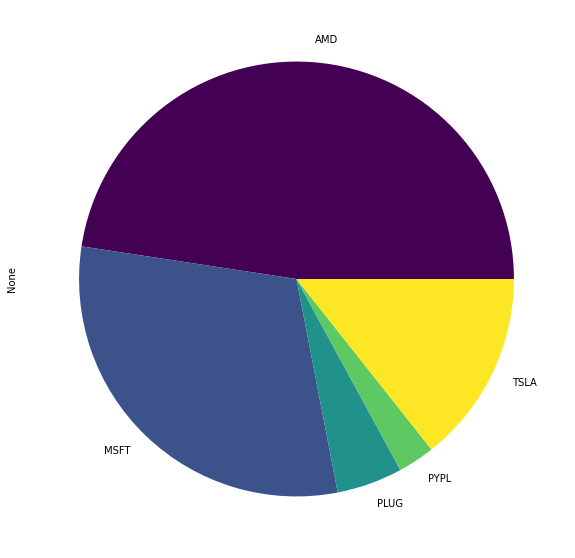

In [33]:
pd.Series(optimized_weights_dict_3).plot.pie(figsize=(10, 10), colormap='viridis')
plt.show()

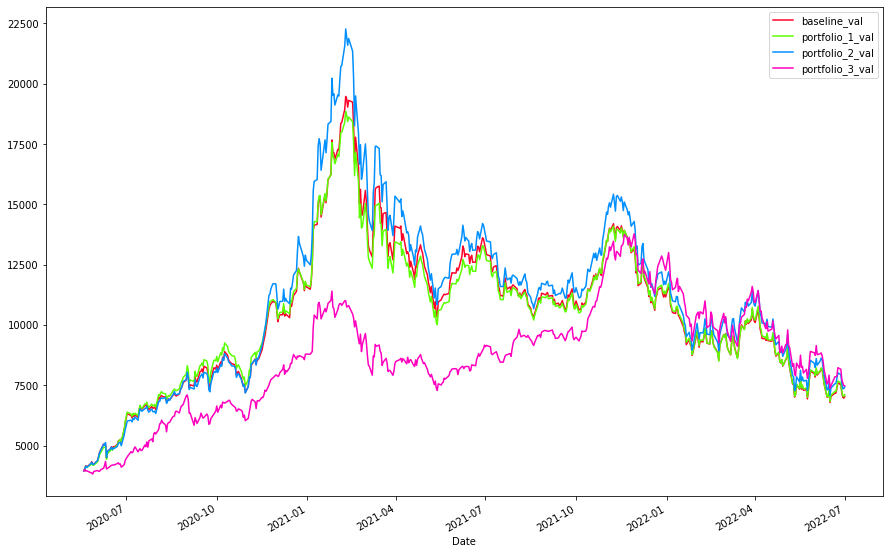

In [34]:
portfolio_weights = [baseline_weights, optimized_weights_dict_1, optimized_weights_dict_2, optimized_weights_dict_3]
portfolio_performance = pd.DataFrame(index = future_prices.index)
for i, weights in enumerate(portfolio_weights):
    portfolio_future = future_prices.copy()
    portfolio_future = portfolio_future[weights.keys()]
    quantities = 3950*np.array(list(weights.values())) / portfolio_future.iloc[-1]

    portfolio_future['portfolio_val'] = (portfolio_future[portfolio_future.columns] * quantities).sum(axis=1)
    if i==0:
        portfolio_performance['baseline_val'] = portfolio_future['portfolio_val']
    else:
        portfolio_performance[f'portfolio_{i}_val'] = portfolio_future['portfolio_val']
    
portfolio_performance.plot(figsize=(15,10), colormap='gist_rainbow')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show() 

# Efficient Frontier

In [35]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(prices.columns)
num_portfolios = 10000

In [36]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    er = np.array(exp_return).reshape(-1,1)
    cov = np.array(stock_cov)
    portfolio_er = er.T@weights
    portfolio_vol = (weights.T @ cov @ weights * 250)**(.5)
    
    p_ret.append(portfolio_er)
    p_vol.append(portfolio_vol)
    
#     returns = np.dot(weights, exp_return) # Returns are the product of individual expected returns of asset and its 
#                                       # weights 
    
#     var = stock_cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
#     sd = np.sqrt(var) # Daily standard deviation
#     ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    
#     p_ret.append(returns)
#     p_vol.append(ann_sd)

In [37]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(prices.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [38]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,ACB weight,AMD weight,CWH weight,DAL weight,FCEL weight,GLW weight,INTU weight,KOPN weight,...,PLAY weight,PLUG weight,PYPL weight,RUN weight,SPOT weight,SPWR weight,TCEHY weight,TRUP weight,TSLA weight,WKHS weight
0,[-0.0003697157948593192],0.347293,0.056293,0.026541,0.036994,0.013175,0.021179,0.022631,0.093880,0.067066,...,0.065891,0.003877,0.050132,0.027659,0.076932,0.060131,0.062304,0.043756,0.037058,0.053444
1,[-0.0004062521148034565],0.377107,0.074084,0.022482,0.075306,0.041390,0.074364,0.068876,0.077074,0.043887,...,0.024521,0.071004,0.056748,0.006948,0.044851,0.049284,0.030673,0.012281,0.058792,0.014093
2,[-0.00022789769413376535],0.366567,0.065287,0.068876,0.050304,0.057454,0.020875,0.025115,0.010810,0.000837,...,0.062309,0.010795,0.050047,0.065173,0.017449,0.023413,0.062297,0.069622,0.059709,0.080978
3,[-0.0004993882989590393],0.371454,0.006000,0.075368,0.038119,0.049479,0.096816,0.048654,0.057625,0.096689,...,0.034045,0.018486,0.018928,0.009555,0.012915,0.010111,0.092131,0.032232,0.025079,0.042116
4,[-0.0005719884830380998],0.388538,0.023349,0.007764,0.002879,0.029492,0.084713,0.065681,0.029958,0.065542,...,0.071220,0.050118,0.019390,0.076627,0.028104,0.067819,0.038664,0.033967,0.089458,0.048359


In [39]:
p_ret_num = np.array(p_ret)
idx = np.argmax(p_ret_num)
best_weights = p_weights[idx]
best_weights

array([0.00592622, 0.14741352, 0.00274982, 0.01425081, 0.00769767,
       0.03539692, 0.02003121, 0.01591184, 0.02164628, 0.03468586,
       0.0670466 , 0.00199377, 0.05150203, 0.07346819, 0.07527173,
       0.00124525, 0.03672537, 0.03256535, 0.09159745, 0.03758739,
       0.15217363, 0.07311311])

In [40]:
optimized_weights_dict_ef = {}
portfolio_end_val = 0
for i, stock in enumerate(prices.columns):
        weight = best_weights[i]
        optimized_weights_dict_ef[stock] = weight

        invest_val = weight * portfolio_init_val
        quantity = invest_val / future_prices.iloc[-1][stock]

        portfolio_end_val += quantity * future_prices.iloc[0][stock]
portfolio_end_val

8012.375817594783

# Kaggle

In [41]:
#Define frequently used functions.
# r is each stock's return, w is the portion of each stock in our portfolio, and covar is the covariance matrix
# Rate of return
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))
def sharpe (ret,vol):
    return ret/vol

In [42]:
# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((change.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(change.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,stock_cov)) * 250)
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (ret(exp_return,w_min)*100), 'risk: % .3f'% vol(w_min,stock_cov))

[0.   0.   0.   0.04 0.   0.   0.01 0.   0.02 0.12 0.26 0.02 0.   0.
 0.   0.   0.15 0.   0.26 0.09 0.   0.03]
return:  0.02 risk:  0.017


In [43]:
optimized_weights_dict_km = {}
portfolio_end_val = 0
for i, stock in enumerate(prices.columns):
        weight = w_min[i]
        optimized_weights_dict_km[stock] = weight

        invest_val = weight * portfolio_init_val
        quantity = invest_val / future_prices.iloc[-1][stock]

        portfolio_end_val += quantity * future_prices.iloc[0][stock]
portfolio_end_val

4441.136647269065

In [44]:
#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,stock_cov)))/exp_return.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (ret(exp_return,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,stock_cov))

C:\Users\Ziv\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


[0.06 0.28 0.04 0.03 0.14 0.01 0.01 0.05 0.05 0.02 0.   0.   0.08 0.09
 0.   0.02 0.   0.   0.   0.   0.11 0.  ]
return: -0.00 risk:  0.030


In [45]:
optimized_weights_dict_ks = {}
portfolio_end_val = 0
for i, stock in enumerate(prices.columns):
        weight = w_sharpe[i]
        optimized_weights_dict_ks[stock] = weight

        invest_val = weight * portfolio_init_val
        quantity = invest_val / future_prices.iloc[-1][stock]

        portfolio_end_val += quantity * future_prices.iloc[0][stock]
portfolio_end_val

8457.274429506891

# S&P

In [46]:
sp_portfolio = portfolio_optimizer(func, ineq, sp_exp_return, sp_cov, basic_params, sp_future_prices)
sp_optimized_weights_dict, sp_portfolio_end_val, sp_portfolio_er, sp_portfolio_vol = sp_portfolio
sp_portfolio_end_val

C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:10: RuntimeWarning: invalid value encountered in log
  f = f - np.log(-f_temp)
C:\Users\Ziv\Downloads\Portfolio Optimization\constrained_min.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  iterations = np.array(iterations)


8058.189930564216

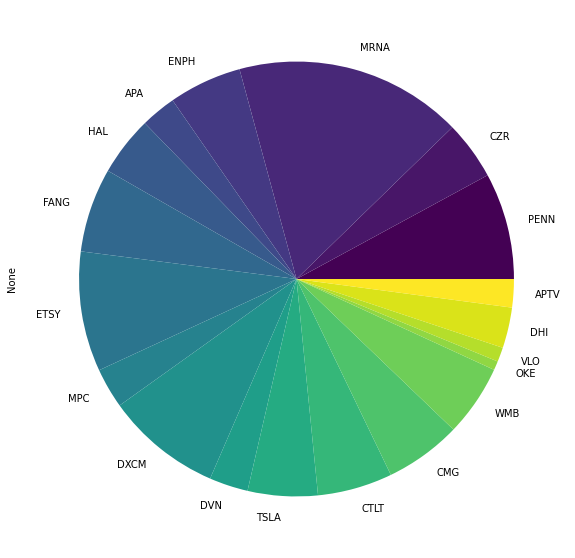

In [47]:
pd.Series(sp_optimized_weights_dict).plot.pie(figsize=(10, 10), colormap='viridis')
plt.show()

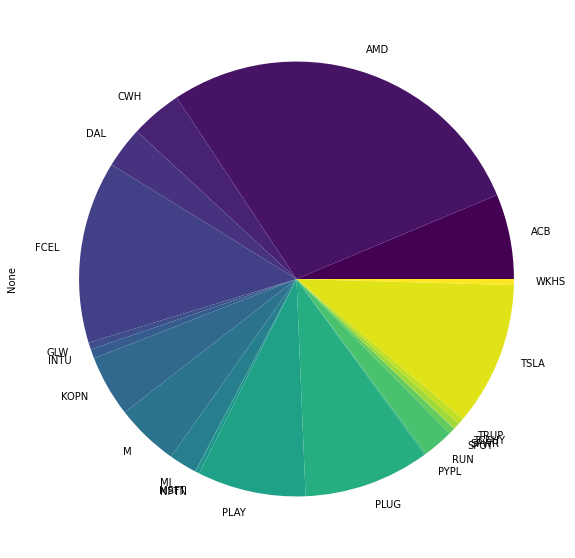

In [48]:
pd.Series(optimized_weights_dict_ks).plot.pie(figsize=(10, 10), colormap='viridis')
plt.show()

In [49]:
portfolio_weights = [optimized_weights_dict_3, optimized_weights_dict_ks]
legend = ['portfolio_3_val', 'trm_portfolio_val']
portfolio_performance = pd.DataFrame(index = future_prices.index)
for i, weights in enumerate(portfolio_weights):
    portfolio_future = future_prices.copy()
    portfolio_future = portfolio_future[weights.keys()]
    quantities = 3950*np.array(list(weights.values())) / portfolio_future.iloc[-1]

    portfolio_future['portfolio_val'] = (portfolio_future[portfolio_future.columns] * quantities).sum(axis=1)
    portfolio_performance[legend[i]] = portfolio_future['portfolio_val']

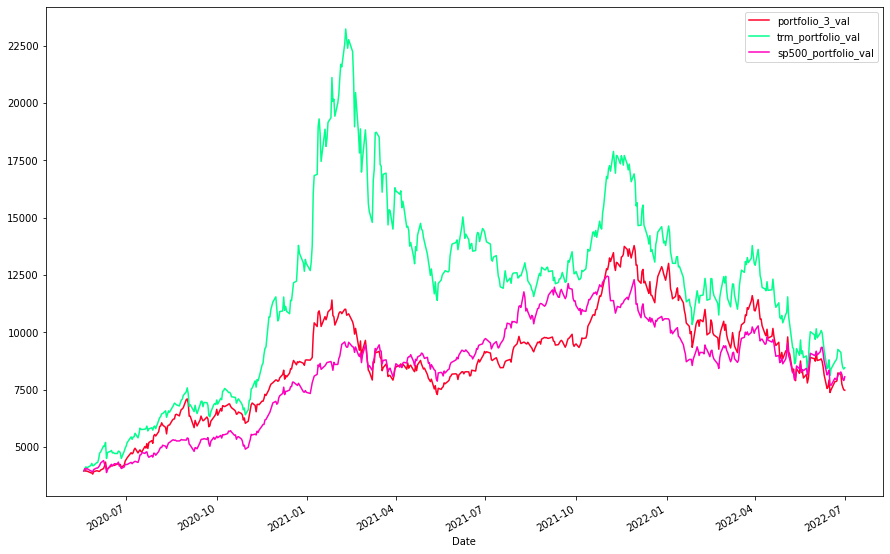

In [50]:
'sp500_portfolio_val'
sp_optimized_weights_dict

portfolio_future = sp_future_prices.copy()
portfolio_future = portfolio_future[sp_optimized_weights_dict.keys()]
quantities = 3950*np.array(list(sp_optimized_weights_dict.values())) / portfolio_future.iloc[-1]

portfolio_future['portfolio_val'] = (portfolio_future[portfolio_future.columns] * quantities).sum(axis=1)
portfolio_performance['sp500_portfolio_val'] = portfolio_future['portfolio_val']


portfolio_performance.plot(figsize=(15,10), colormap='gist_rainbow')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show() 